# Data Exploring

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_feather("../data/player_match_statistics.feather")
df

,Map,Region,Rounds,Winner,Premade,Score,Score First Half,Score Second Half,Score Overtime,Nickname,...,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
0,de_mirage,EU,29,False,False,13,9,4,0,dotoooo,...,20,7,0.50,0.70,0.48,14,2,0,0,1
1,de_mirage,EU,29,False,False,13,9,4,0,s1mple,...,22,13,0.39,1.50,1.14,33,4,0,1,4
2,de_mirage,EU,29,False,False,13,9,4,0,Fessor,...,24,14,0.74,0.79,0.66,19,5,0,0,0
3,de_mirage,EU,29,False,False,13,9,4,0,rallen,...,20,4,0.40,0.50,0.34,10,1,0,0,0
4,de_mirage,EU,29,False,False,13,9,4,0,flameZ-,...,21,9,0.64,0.67,0.48,14,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216958,de_nuke,EU,25,True,False,16,11,5,0,Lambert,...,17,10,0.45,1.29,0.88,22,2,0,1,1
216959,de_nuke,EU,25,True,False,16,11,5,0,Yeneurs,...,15,10,0.43,1.53,0.92,23,5,0,0,2
216960,de_nuke,EU,25,True,False,16,11,5,0,-YouKnow,...,16,5,0.26,1.19,0.76,19,4,0,0,2
216961,de_nuke,EU,25,True,False,16,11,5,0,reCALEEED-M-,...,15,10,0.53,1.27,0.76,19,3,0,1,0


In [16]:
df.columns

Index(['Map', 'Region', 'Rounds', 'Winner', 'Premade', 'Score',
       'Score First Half', 'Score Second Half', 'Score Overtime', 'Nickname',
       'Player ID', 'Professional', 'Assists', 'Deaths', 'Headshots',
       'Headshot Ratio', 'K/D Ratio', 'K/R Ratio', 'Kills', 'MVPs', 'Ace',
       'Quad Kills', 'Triple Kills'],
      dtype='object')

## Eigenschaften des Datensatzes

In [14]:
df.describe()

,Rounds,Score,Score First Half,Score Second Half,Score Overtime,Assists,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
count,80416.000000,80416.00000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000
mean,26.635433,13.32700,7.502388,5.432227,0.392385,3.416882,18.714758,8.867651,0.477784,1.081807,0.700665,18.673809,2.668984,0.023441,0.206016,1.026089
std,5.235746,4.41636,2.848374,2.809783,1.448636,2.072360,4.866905,4.240026,0.160136,0.635158,0.225990,6.849107,1.809258,0.154632,0.467137,1.079638
min,9.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-0.110000,-0.120000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,10.00000,6.000000,3.000000,0.000000,2.000000,16.000000,6.000000,0.370000,0.730000,0.550000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,26.000000,16.00000,8.000000,6.000000,0.000000,3.000000,19.000000,8.000000,0.480000,1.000000,0.690000,18.000000,2.000000,0.000000,0.000000,1.000000
75%,29.000000,16.00000,9.000000,7.000000,0.000000,5.000000,21.000000,11.000000,0.580000,1.290000,0.840000,23.000000,4.000000,0.000000,0.000000,2.000000
max,66.000000,34.00000,15.000000,14.000000,19.000000,19.000000,56.000000,40.000000,7.000000,22.000000,2.140000,67.000000,15.000000,2.000000,5.000000,10.000000


In [15]:
df_standardized = (df-df.mean())/df.std()
df_standardized.corr()["Professional"].sort_values()

/tmp/ipykernel_1096/155972180.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_standardized = (df-df.mean())/df.std()
/tmp/ipykernel_1096/155972180.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_standardized = (df-df.mean())/df.std()


Deaths              -0.056286
Rounds              -0.003214
Score Overtime       0.000167
Headshot Ratio       0.019483
Score Second Half    0.020311
Ace                  0.027537
Assists              0.035146
Score                0.051805
Quad Kills           0.051896
Winner               0.052413
Score First Half     0.060202
Triple Kills         0.062743
Headshots            0.078180
MVPs                 0.084478
Kills                0.085275
Premade              0.096864
K/D Ratio            0.097237
K/R Ratio            0.106022
Professional         1.000000
Name: Professional, dtype: float64

Die Korrelation des Datensatzes zeigt keine eindeutige Korrelation zwischen professionellen und normalen Spieler zu irgendeinem Attribut auf. Schaut man sich die Korrelation zwischen dem `Professional` und dem `Kills` Feature an zeigt sich, dass professionelle Spieler scheinbar mehr Kills machen als normale. Ein Blick auf die Korrelation zum `Deaths` Feature zeigt weiterhin, dass professionelle Spieler auch ein bisschen weniger getötet werden als normale. Dies wird vorallem bei der Korrelation zum `K/D Ratio` (Kills / Deaths Verhältnis) sichtbar: dort zeigt sich eine größere Korrelation. Ebenso bei der `K/R Ration`, als Kills pro Runde zeigt sich eine deutlich positive Korrelation.

In [27]:
df['Map'] = df['Map'].astype('category')
df['Region'] = df['Region'].astype('category')
df.dtypes

Map                   object
Region                object
Rounds                 int64
Winner                  bool
Premade                 bool
Score                  int64
Score First Half       int64
Score Second Half      int64
Score Overtime         int64
Nickname              object
Player ID             object
Professional            bool
Assists                int64
Deaths                 int64
Headshots              int64
Headshot Ratio       float64
K/D Ratio            float64
K/R Ratio            float64
Kills                  int64
MVPs                   int64
Ace                    int64
Quad Kills             int64
Triple Kills           int64
dtype: object

In [28]:
df.isna().sum()

Map                  0
Region               0
Rounds               0
Winner               0
Premade              0
Score                0
Score First Half     0
Score Second Half    0
Score Overtime       0
Nickname             0
Player ID            0
Professional         0
Assists              0
Deaths               0
Headshots            0
Headshot Ratio       0
K/D Ratio            0
K/R Ratio            0
Kills                0
MVPs                 0
Ace                  0
Quad Kills           0
Triple Kills         0
dtype: int64

Min negativ headshot-ratio, k/d etc. -> weil teamkills -> Soll mit einberechnet werden -> KEIN invalid value

## Distribution of Professional

In [49]:
counts = df["Professional"].value_counts()

In [51]:
counts[1] / (counts[0] + counts[1])

0.13960872682577077

## Violin plots

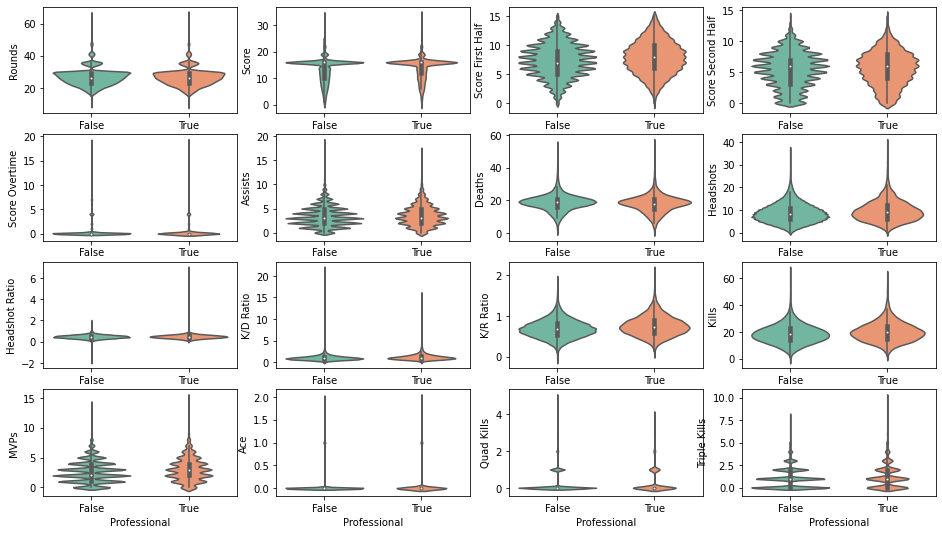

In [29]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(16, 9))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.violinplot(y=column, x="Professional", data=df, palette="Set2", ax=ax)

## Influence of Maps

In [30]:
df["Map"].value_counts()

de_mirage                              21078
de_inferno                             14368
de_dust2                               12133
de_nuke                                 8863
de_overpass                             7908
de_vertigo                              6015
de_ancient                              4515
de_train                                3734
de_cache                                1379
de_cbble                                 225
workshop/2329980048/de_austria_fi         40
workshop/225151817/de_bazaar              39
workshop/2233304302/de_sanjuan_v073       29
workshop/1981407062/de_chlorine           20
workshop/2714332928/de_ali_fi             20
workshop/322837144/de_season              20
workshop/1542127528/de_cbble              10
workshop/727934907/de_thrill              10
workshop/1986081493/de_mocha              10
Name: Map, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Map'>

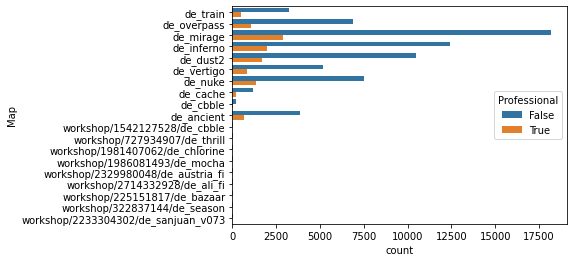

In [31]:
sns.countplot(data=df, y="Map", hue="Professional")

In [32]:
df = df[df["Map"].str.startswith('de')].reset_index(drop=True)

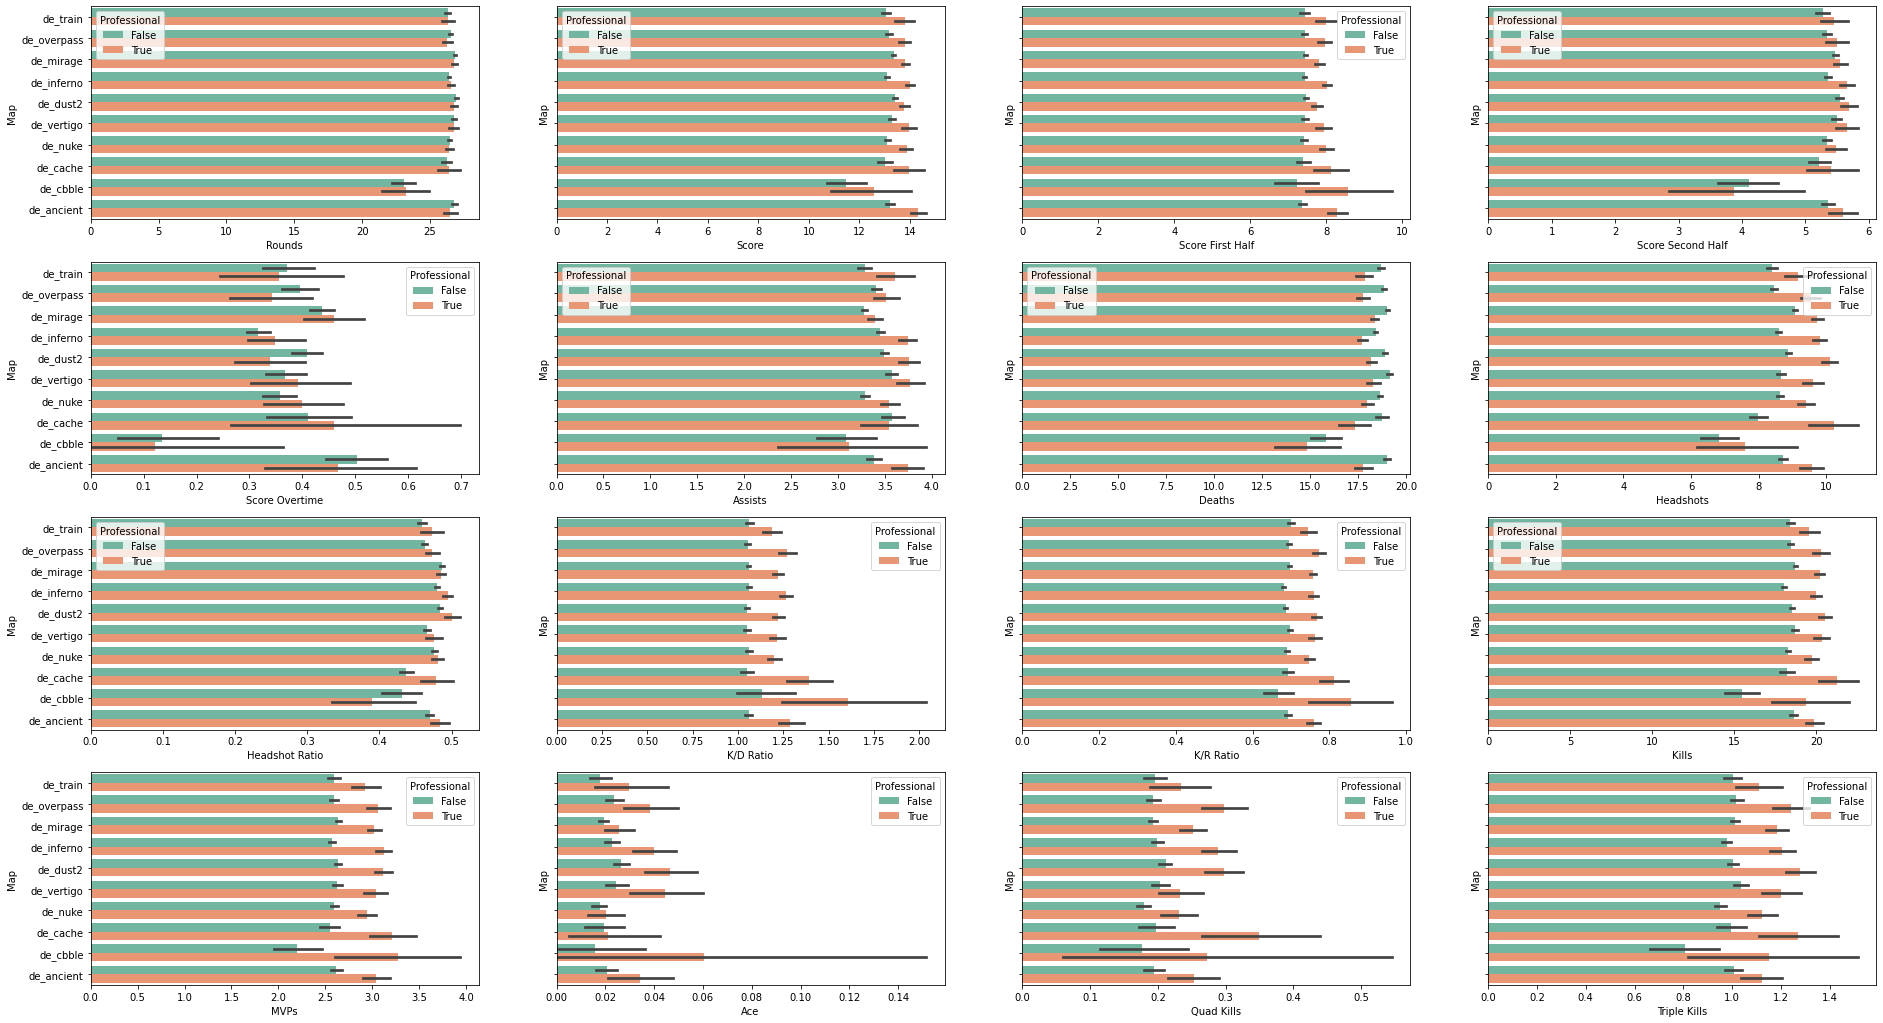

In [33]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(32, 18), sharey=True)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.barplot(x=column, y="Map", hue="Professional", data=df, palette="Set2", ax=ax)

## Influence of Regions

<AxesSubplot:xlabel='count', ylabel='Region'>

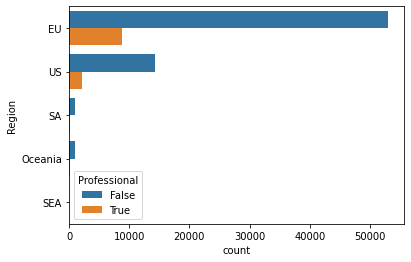

In [34]:
sns.countplot(data=df, y="Region", hue="Professional")

In [35]:
df = df[df.eval("Region in ['EU', 'US']")].reset_index(drop=True)

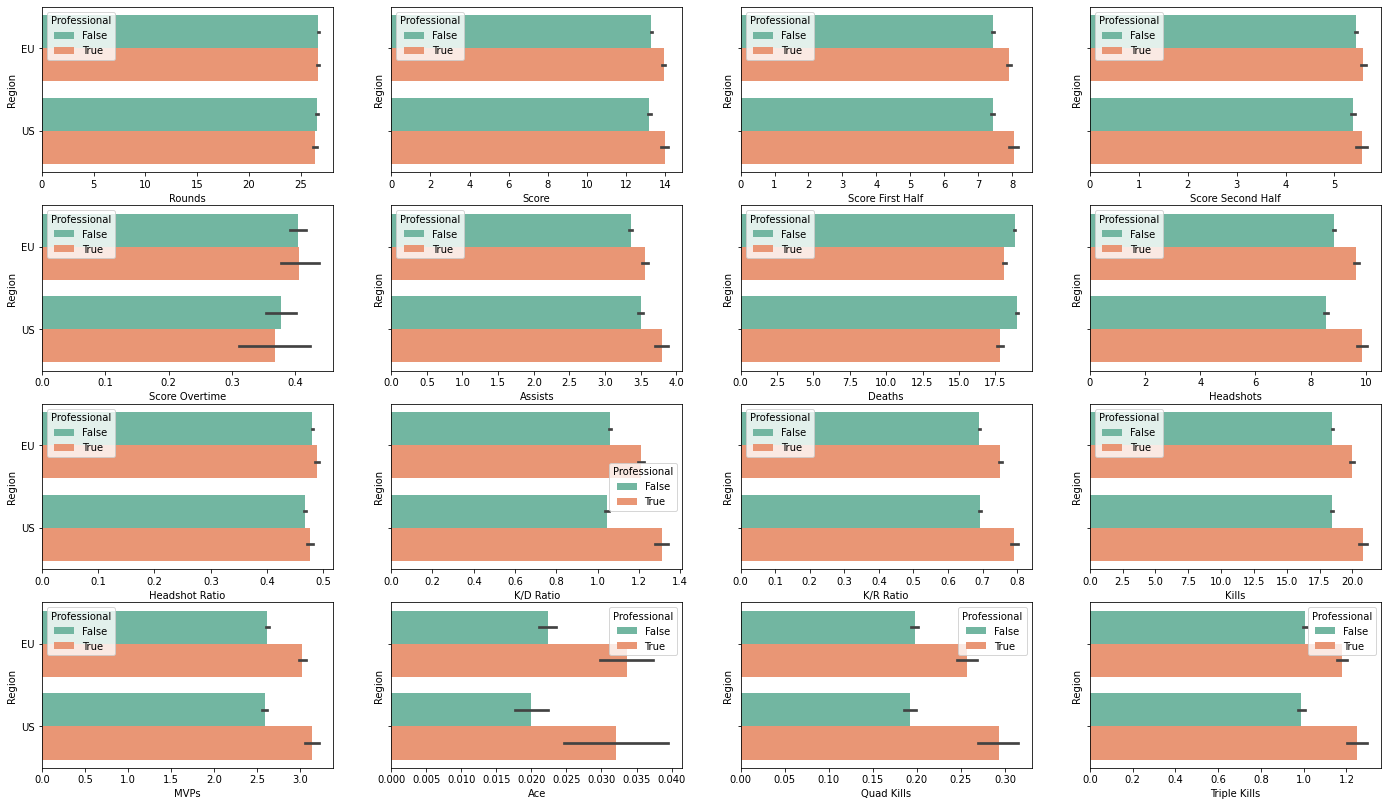

In [36]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharey=True, sharex=False)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.barplot(x=column, y="Region", hue="Professional", data=df, palette="Set2", ax=ax)

## Premade

<AxesSubplot:xlabel='count', ylabel='Premade'>

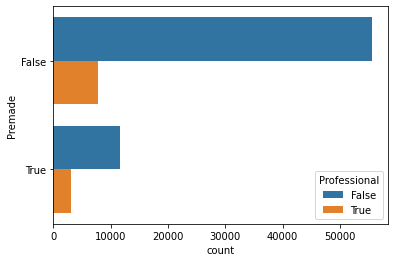

In [37]:
sns.countplot(data=df, y="Premade", hue="Professional")

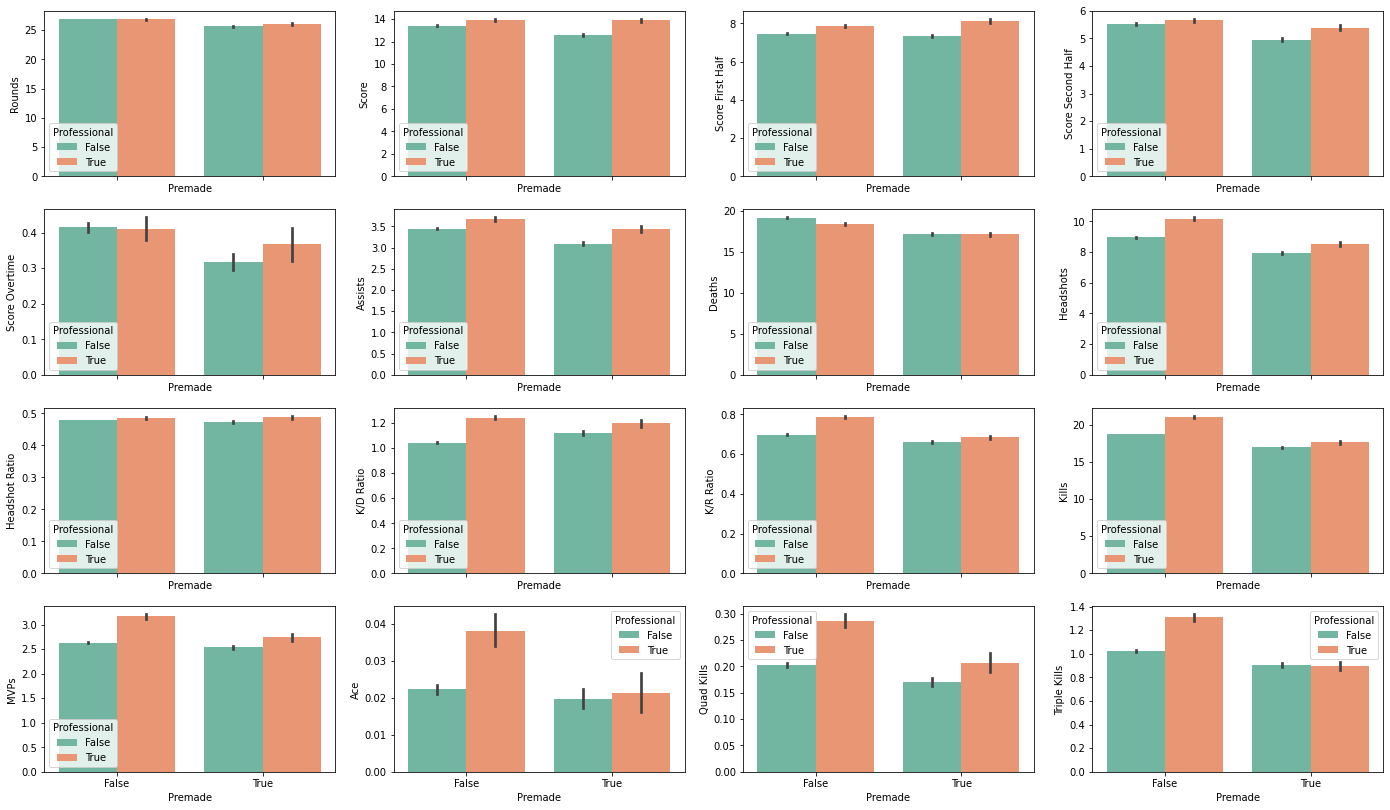

In [38]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharey=False, sharex=True)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.barplot(y=column, x="Premade", hue="Professional", data=df, palette="Set2", ax=ax)

## Write cleaned

In [40]:
df["Map"].unique()

array(['de_train', 'de_overpass', 'de_mirage', 'de_inferno', 'de_dust2',
       'de_vertigo', 'de_nuke', 'de_cache', 'de_cbble', 'de_ancient'],
      dtype=object)

In [42]:
df.to_feather("../data/player_match_statistics_cleaned.feather")